In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [19]:
x=mnist.data
x.shape

(70000, 784)

In [20]:
y=mnist.target
y.shape

(70000,)

In [21]:
type(mnist.data)

pandas.core.frame.DataFrame

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [31]:
x_num=np.array(x)

In [33]:
x_num

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
some_data=x_num[36011]
some_data_image=some_data.reshape(28,28)

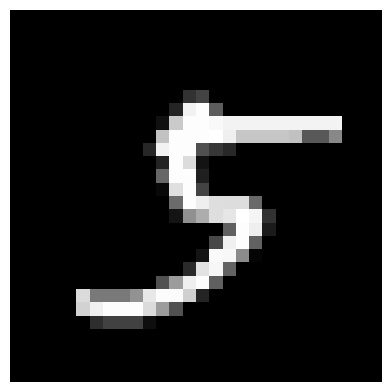

In [104]:
plt.matshow(some_data_image)
plt.axis('off')
plt.show()

In [102]:
y[36011]

'5'

In [48]:
x_train,x_test=x[:60000],x[60000:]

In [49]:
y_train,y_test=y[:60000],y[60000:]

In [55]:
import numpy as np
shuffled_indices=np.random.permutation(60000)
x_train,y_train=x_train.iloc[shuffled_indices],y_train.iloc[shuffled_indices]

# For Binary Classification


In [119]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_5 = (y_train !=5)
y_test_5 = (y_test !=5)
y_train_5.value_counts()

True     54579
False     5421
Name: class, dtype: int64

In [132]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')

In [133]:
model.fit(x_train,y_train_5)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
model.predict([some_data])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [137]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(model,x_train,y_train_5,cv=5,scoring='accuracy')

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [138]:
accuracy.mean()

0.9746833333333333

In [140]:
y_preds=model.predict(x_test)

In [141]:
y_preds

array([ True,  True,  True, ...,  True, False,  True])

In [145]:
from sklearn.metrics import precision_score,recall_score,f1_score 

precision = precision_score(y_preds,y_test_5,average='weighted')
recall = recall_score(y_preds,y_test_5, average='weighted')
f1 = f1_score(y_preds,y_test_5, average='weighted')

In [146]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.9790437164095626
Recall: 0.9779
F1-Score: 0.9783273436981456
